In [1]:
import gym
import random
import numpy as np
import time
from IPython.display import clear_output

In [2]:
from routing_002.envs import Routing

init 1
source =  7
destination =  2
curr_state =  58
p =  {0: {0: [(0, -100, False, 1)], 1: [(0, -100, False, 1)], 2: [(16, 9, False, 1)], 3: [(24, 9, False, 1)], 4: [(32, 9, False, 1)], 5: [(0, -100, False, 1)], 6: [(0, -100, False, 1)], 7: [(0, -100, False, 1)]}, 1: {0: [(1, -100, False, 1)], 1: [(1, -100, False, 1)], 2: [(17, 4, False, 1)], 3: [(25, 9, False, 1)], 4: [(33, 4, False, 1)], 5: [(1, -100, False, 1)], 6: [(1, -100, False, 1)], 7: [(1, -100, False, 1)]}, 2: {0: [(2, -100, False, 1)], 1: [(2, -100, False, 1)], 2: [(18, 99, True, 1)], 3: [(26, 4, False, 1)], 4: [(34, 4, False, 1)], 5: [(2, -100, False, 1)], 6: [(2, -100, False, 1)], 7: [(2, -100, False, 1)]}, 3: {0: [(3, -100, False, 1)], 1: [(3, -100, False, 1)], 2: [(19, 4, False, 1)], 3: [(27, 99, True, 1)], 4: [(35, 4, False, 1)], 5: [(3, -100, False, 1)], 6: [(3, -100, False, 1)], 7: [(3, -100, False, 1)]}, 4: {0: [(4, -100, False, 1)], 1: [(4, -100, False, 1)], 2: [(20, 4, False, 1)], 3: [(28, 4, False, 1)], 4: [(36, 

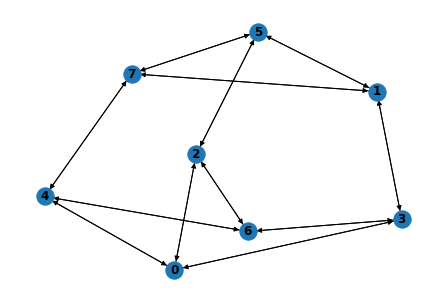

In [3]:
env = gym.make('routing-v1')

In [4]:
#env.reset()

In [5]:
#env.step(2)

In [6]:
""""for e in range(100):
    env.reset()
    
    for i in range(10):
        action = random.randrange(1,8)
        nxt_state, reward, done, _ = env.step(action)
        if done == True: 
            break
   """

'"for e in range(100):\n    env.reset()\n    \n    for i in range(10):\n        action = random.randrange(1,8)\n        nxt_state, reward, done, _ = env.step(action)\n        if done == True: \n            break\n   '

In [7]:
action_space_size = env.num_actions
state_space_size = env.num_states

q_table = np.zeros((state_space_size,action_space_size))
#print(q_table)

In [8]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [9]:
rewards_all_episodes = []

#Q-Learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    rewards_current_episodes = 0
    
    for step in range(max_steps_per_episode):
        
        #exploration exploiatation trade-off
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            #print("state for action : ", state)
            action = np.argmax(q_table[state,:])
            #print("max action = ", action)
        else:
            action = random.randrange(0,8)#choose any node from 0 to 7
           # print("random action", action )
        new_state, reward, done, info = env.step(action)
        
        # Update Q-Table for Q(s,a)
        
        q_table[state,action] = q_table[state,action] * (1 - learning_rate) + \
learning_rate * (reward + discount_rate*np.max(q_table[new_state,:]))
        
        state = new_state
        rewards_current_episodes += reward

        if done == True:
            break
            
        #exploration rate decay
        exploration_rate = min_exploration_rate + \
            (max_exploration_rate - min_exploration_rate) * \
            np.exp(-exploration_decay_rate*episode)
        
        rewards_all_episodes.append(rewards_current_episodes)
    
print(np.array(rewards_all_episodes))
#calculate and print the avg reqard per thousand episodes
#rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
#for r in rewards_per_thousand_episodes:
 #   print(count, ": ", str(sum(r/1000)))
 #   count += 1000
    
#Print updated Q table 
print("\n\n-------Q-table-------\n")
print(q_table)


called function reset
reset source =  7
reset destination =  2
reset curr_state =  58
returning :  42 9 False 1
returning :  58 4 False 1
returning :  58 -100 False 1
returning :  58 -100 False 1
returning :  58 -100 False 1
returning :  10 4 False 1
returning :  10 -100 False 1
returning :  26 4 False 1
returning :  50 9 False 1
returning :  34 4 False 1
returning :  34 -100 False 1
returning :  34 -100 False 1
returning :  34 -100 False 1
returning :  34 -100 False 1
returning :  34 -100 False 1
returning :  2 9 False 1
returning :  18 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  38 -100 False 1
returning :  38 -100 False 1
returning :  38 -100 False 1
returning :  38 -100 False 1
returning :  38 -100 False 1
returning :  38 -100 False 1
returning :  38 -100 False 1
returning :  62 4 False 1
returning :  62 -100 False 1
returning :  62 -100 False 1
returning :  62 -100 False 1
returning :  62 -100 False 1
returning :  62

returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  20 -100 False 1
returning :  44 4 False 1
returning :  12 4 False 1
returning :  12 -100 False 1
returning :  12 -100 False 1
returning :  12 -100 False 1
returning :  60 9 False 1
returning :  60 -100 False 1
returning :  44 4 False 1
returning :  60 9 False 1
returning :  60 -100 False 1
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  1
reset curr_state =  1
returning :  1 -100 False 1
returning :  1 -100 False 1
returning :  17 4 False 1
returning :  17 -100 False 1
returning :  17 -100 False 1
returning :  17 -100 False 1
returning :  49 4 False 1
returning :  49 -100 False 1
returning :  17 4 False 1
returning :  17 -100 False 1
returning :  41 9 False 1
returning :  41 -100 False 1
re

returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  21 -100 False 1
returning :  21 -100 False 1
returning :  21 -100 False 1
returning :  21 -100 False 1
returning :  53 4 False 1
returning :  29 4 False 1
returning :  29 -100 False 1
returning :  5 4 False 1
returning :  37 4 False 1
returning :  37 -100 False 1
returning :  37 -100 False 1
returning :  37 -100 False 1
returning :  61 9 False 1
returning :  61 -100 False 1
returning :  13 9 False 1
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  19 -100 False 1
returning :  3 9 False 1
returning :  3 -100 False 1
returning :  3 -100 False 1
returning :  3 -100 False 1
returning :  27 99 True 1
called function reset
reset source =  1
reset destination =  3
reset curr_state =  1

returning :  56 -100 False 1
returning :  56 -100 False 1
returning :  56 -100 False 1
returning :  40 4 False 1
returning :  40 -100 False 1
returning :  56 4 False 1
returning :  56 -100 False 1
returning :  56 -100 False 1
returning :  56 -100 False 1
returning :  56 -100 False 1
returning :  56 -100 False 1
returning :  32 9 False 1
returning :  32 -100 False 1
returning :  0 99 True 1
called function reset
reset source =  6
reset destination =  1
reset curr_state =  49
returning :  17 4 False 1
returning :  17 -100 False 1
returning :  1 4 False 1
returning :  1 -100 False 1
returning :  25 9 False 1
returning :  49 4 False 1
returning :  49 -100 False 1
returning :  49 -100 False 1
returning :  49 -100 False 1
returning :  49 -100 False 1
returning :  49 -100 False 1
returning :  49 -100 False 1
returning :  49 -100 False 1
returning :  49 -100 False 1
returning :  49 -100 False 1
returning :  49 -100 False 1
returning :  49 -100 False 1
returning :  49 -100 False 1
returning :  

returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  7
reset curr_state =  23
returning :  55 4 False 1
returning :  39 9 False 1
returning :  55 4 False 1
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  32 -100 False 1
returning :  0 99 True 1
called function reset
reset source =  6
reset destination =  2
reset curr_state =  50
returning :  50 -100 False 1
returning :  50 -100 False 1
returning :  18 99 True 1
called function reset
reset source =  3
reset destination =  2
reset curr_state =  26
returning :  26 -100 False 1
returning :  50 9 False 1
returning :  18 99 True 1
called function reset
reset source =  6
reset destination =  1
reset curr_state =  49
returning :  25 9 False 1
returning :  25 -100 False 1
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  4
reset curr_state =  28
returning :  4 9 False 1
retu

reset destination =  2
reset curr_state =  34
returning :  50 9 False 1
returning :  50 -100 False 1
returning :  34 4 False 1
returning :  58 4 False 1
returning :  58 -100 False 1
returning :  58 -100 False 1
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  25 -100 False 1
returning :  25 -100 False 1
returning :  49 4 False 1
returning :  17 4 False 1
returning :  17 -100 False 1
returning :  41 9 False 1
returning :  57 9 False 1
returning :  57 -100 False 1
returning :  9 99 True 1
called function reset
reset source =  6
reset destination =  4
reset curr_state =  52
returning :  52 -100 False 1
returning :  52 -100 False 1
returning :  36 99 True 1
called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  46 -100 False 1
returning

returning :  62 4 False 1
returning :  62 -100 False 1
returning :  14 4 False 1
returning :  46 4 False 1
returning :  62 4 False 1
returning :  62 -100 False 1
returning :  14 4 False 1
returning :  14 -100 False 1
returning :  62 4 False 1
returning :  38 9 False 1
returning :  6 4 False 1
returning :  38 9 False 1
returning :  6 4 False 1
returning :  6 -100 False 1
returning :  38 9 False 1
returning :  38 -100 False 1
returning :  38 -100 False 1
returning :  62 4 False 1
returning :  38 9 False 1
returning :  38 -100 False 1
returning :  38 -100 False 1
returning :  54 99 True 1
called function reset
reset source =  1
reset destination =  7
reset curr_state =  15
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  2 -100 False 1
returning :  18 99 True 1
called function reset
reset source =  1
reset destination =  0
reset curr_state =  8
returning :  24 9 False 1
returning :  24 -10

returning :  55 -100 False 1
returning :  39 9 False 1
returning :  7 4 False 1
returning :  31 4 False 1
returning :  7 4 False 1
returning :  31 4 False 1
returning :  7 4 False 1
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  8 4 False 1
returning :  8 -100 False 1
returning :  8 -100 False 1
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  60 -100 False 1
returning :  60 -100 False 1
returning :  60 -100 False 1
returning :  36 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18

returning :  17 4 False 1
returning :  17 -100 False 1
returning :  41 9 False 1
returning :  9 99 True 1
called function reset
reset source =  6
reset destination =  7
reset curr_state =  55
returning :  31 4 False 1
returning :  31 -100 False 1
returning :  31 -100 False 1
returning :  31 -100 False 1
returning :  31 -100 False 1
returning :  31 -100 False 1
returning :  15 9 False 1
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  3 9 False 1
returning :  3 -100 False 1
returning :  3 -100 False 1
returning :  27 99 True 1
called function reset
reset source =  1
reset destination =  7
reset curr_state =  15
returning :  47 9 False 1
returning :  47 -100 False 1
returning :  63 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
r

returning :  10 -100 False 1
returning :  42 9 False 1
returning :  42 -100 False 1
returning :  18 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state =  33
returning :  57 9 False 1
returning :  57 -100 False 1
returning :  57 -100 False 1
returning :  57 -100 False 1
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  5
reset curr_state =  29
returning :  13 9 False 1
returning :  45 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
returning :  60 9 False 1
returning :  60 -100 False 1
returning :  36 99 True 1
called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returning :  62 -100 False 1
returning :  62 -100 False 1
returning :  62 -100 False 1
returning :  46 4 False 1
returning :  46 -100 False 1
returning :  46 -100 False 1
returning :  14 4 False 1
returning :  30 9 False 1
returning :  30 -100 False

reset destination =  5
reset curr_state =  13
returning :  45 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  3
reset destination =  2
reset curr_state =  26
returning :  50 9 False 1
returning :  18 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
returning :  28 4 False 1
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  6
reset destination =  7
reset curr_state =  55
returning :  39 9 False 1
returning :  39 -100 False 1
returning :  63 99 True 1
called function reset
reset source =  6
reset destination =  1
reset curr_state =  49
returning :  25 9 False 1
returning :  25 -100 False 1
returning :  1 4 False 1
returning :  1 -100 False 1
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  6
reset destination =  5
reset curr_state =  53
returning :  21 9

reset source =  4
reset destination =  3
reset curr_state =  35
returning :  3 9 False 1
returning :  35 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  5
reset curr_state =  53
returning :  53 -100 False 1
returning :  37 4 False 1
returning :  61 9 False 1
returning :  61 -100 False 1
returning :  45 99 True 1
called function reset
reset source =  6
reset destination =  4
reset curr_state =  52
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state =  33
returning :  57 9 False 1
returning :  57 -100 False 1
returning :  9 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  20 4 False 1
returning :  44 4 False 1
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  1
reset destination =  6
reset curr_state =  14
returning :  30 9 False 1
returning :  54 99 True 1
called 

reset curr_state =  48
returning :  48 -100 False 1
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
returning :  44 4 False 1
returning :  60 9 False 1
returning :  60 -100 False 1
returning :  36 99 True 1
called function reset
reset source =  5
reset destination =  2
reset curr_state =  42
returning :  42 -100 False 1
returning :  18 99 True 1
called function reset
reset source =  7
reset destination =  0
reset curr_state =  56
returning :  32 9 False 1
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  57 -100 False 1
returning :  33 4 False 1
returning :  57 9 False 1
returning :  57 -100 False 1
returning :  57 -100 False 1
returning :  57 -100 False 1
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  5
reset curr_state =  29
returning :  29 -100 False 1
returning :  13 9 False 1
return

returning :  28 -100 False 1
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  24 -100 False 1
returning :  8 4 False 1
returning :  8 -100 False 1
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  59 4 False 1
returning :  43 4 False 1
returning :  19 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  21 -100 False 1
returning 

returning :  57 -100 False 1
returning :  9 99 True 1
called function reset
reset source =  0
reset destination =  6
reset curr_state =  6
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  3
reset destination =  5
reset curr_state =  29
returning :  13 9 False 1
returning :  45 99 True 1
called function reset
reset source =  3
reset destination =  6
reset curr_state =  30
returning :  54 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  25 -100 False 1
returning :  9 99 True 1
called function reset
reset source =  5
reset destination =  4
reset curr_state =  44
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  4 -100 False 1
retu

reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  49 4 False 1
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  2
reset curr_state =  26
returning :  50 9 False 1
returning :  18 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  3
reset curr_state =  3
returning :  27 99 True 1
called function reset
reset source =  2
reset destination =  1
reset curr_state =  17
returning :  41 9 False 1
returning :  9 99 True 1
called function reset
reset source =  5
reset destination =  

called function reset
reset source =  0
reset destination =  7
reset curr_state =  7
returning :  31 4 False 1
returning :  31 -100 False 1
returning :  15 9 False 1
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  4
reset destination =  2
reset curr_state =  34
returning :  2 9 False 1
returning :  18 99 True 1
called function reset
reset source =  1
reset destination =  3
reset curr_state =  11
returning :  27 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  37 -100 False 1
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  7
reset curr_state =  7
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  62 -100 False 1
ret

returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  3
reset destination =  4
reset curr_state =  28
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  35 -100 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  3
reset curr_state =  51
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  7
reset curr_state =  39
returning :  39 -100 False 1
returning :  63 99 True 1
called function reset
reset sour

reset destination =  7
reset curr_state =  39
returning :  63 99 True 1
called function reset
reset source =  0
reset destination =  3
reset curr_state =  3
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  0
reset curr_state =  56
returning :  32 9 False 1
returning :  0 99 True 1
called function reset
reset source =  6
reset destination =  0
reset curr_state =  48
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  46 4 False 1
returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  3
reset destination =  4
reset curr_state =  28
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  1
reset curr_state =  17
returning :  41 9 False 1
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state

returning :  16 9 False 1
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  35 -100 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  3
reset destination =  7
reset curr_state =  31
returning :  15 9 False 1
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  2
reset destination =  0
reset curr_state =  16
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  6
reset destination =  7
reset curr_state =  55
returning :  55 -100 False 1
returning :  39 9 False 1
returning :  39 -100 False 1
returning :  63 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  7
reset destination =  0


returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  0
reset curr_state =  16
returning :  0 99 True 1
called function reset
reset source =  6
reset destination =  3
reset curr_state =  51
returning :  19 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  5
reset curr_state =  53
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state =  33
returning :  57 9 False 1
returning :  9 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  4 -100 False 1
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  51 9 False 1
returning :  27 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  38 -100 False 1
returni

reset curr_state =  53
returning :  53 -100 False 1
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  23 4 False 1
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  1
reset destination =  0
reset curr_state =  8
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  5
reset destination =  4
reset curr_state =  44
returning :  60 9 False 1
returning :  60 -100 False 1
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  7
reset curr_state =  7
returning :  7 -100 False 1
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  3
reset destination =  6
reset curr_state =  30
returning :  54 99 True 1
called function reset
reset source =  6
reset destination =  7
reset curr_state =  55
returning :  39 9 False 1
returning :  63 99 True 1
called functio

called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  51 9 False 1
returning :  27 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  0 99 True 1
called function reset
reset source =  1
reset destination =  7
reset curr_state =  15
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  6
reset destination =  1
reset curr_state =  49
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  1
reset destination =  5
reset curr_state =  13
returning :  45 99 True 1
called function reset
reset source =  2
reset destination =  6
reset curr_state =  22
returning :  54 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  3 9 False 1
ret

returning :  36 99 True 1
called function reset
reset source =  7
reset destination =  3
reset curr_state =  59
returning :  35 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  38 -100 False 1
returning :  54 99 True 1
called function reset
reset source =  1
reset destination =  5
reset curr_state =  13
returning :  45 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  3
reset destination =  4
reset curr_state =  28
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  1

returning :  63 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  7
reset curr_state =  39
returning :  63 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  25 -100 False 1
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  5
reset curr_state =  61
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  2
reset destination =  1
reset curr_state =  17
returning :  41 9 False 1
returning :  9 99 True 1
called function reset
reset s

called function reset
reset source =  3
reset destination =  2
reset curr_state =  26
returning :  50 9 False 1
returning :  18 99 True 1
called function reset
reset source =  5
reset destination =  0
reset curr_state =  40
returning :  16 9 False 1
returning :  0 99 True 1
called function reset
reset source =  5
reset destination =  1
reset curr_state =  41
returning :  9 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  47 -100 False 1
returning :  63 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  5
reset destination =  3
reset curr_state =  43
returning :  19 4 False 1
re

returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  1
reset curr_state =  49
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  1
reset destination =  0
reset curr_state =  8
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18 99 True 1
called function reset
reset source =  0
reset destination =  6
reset curr_state =  6
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  3
reset destination =  4
reset curr_state =  28
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  3
res

returning :  18 99 True 1
called function reset
reset source =  1
reset destination =  2
reset curr_state =  10
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source =  6
reset destination =  5
reset curr_state =  53
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  2
reset destination =  0
reset curr_state =  16
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  7
reset curr_state =  39
returning :  63 99 True 1
called function reset
reset source =  0
reset destination =  5
reset curr_state =  5
returning :  21 9 False 1
returning :  45 99 True 1
cal

returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  4
reset destination =  2
reset curr_state =  34
returning :  2 9 False 1
returning :  18 99 True 1
called function reset
reset source =  3
reset destination =  7
reset curr_state =  31
returning :  15 9 False 1
returning :  47 9 False 1
returning :  47 -100 False 1
returning :  63 99 True 1
called function reset
reset source =  6
reset destination =  7
reset curr_state =  55
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state =  33
returning :  57 9 False 1
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  7
reset destination =  2
reset curr_state =  58
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  6
reset destination =  7
rese

reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  5
reset destination =  4
reset curr_state =  44
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  6
reset destination =  7
reset curr_state =  55
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  7
reset destination =  5
reset curr_state =  61
returning :  45 99 True 1
called function reset
reset source =  2
reset destination =  0
reset curr_state =  16
returning :  40 4 False 1
returning :  16 9 False 1
returning :  0 99 True 1
called function reset
reset source =  1
reset destination =  0
reset curr_state =  8
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state

reset curr_state =  47
returning :  63 99 True 1
called function reset
reset source =  1
reset destination =  3
reset curr_state =  11
returning :  27 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state =  33
returning :  57 9 False 1
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  9 99 True 1
called function reset
reset source =  6
reset destination =  0
reset 

returning :  36 99 True 1
called function reset
reset source =  3
reset destination =  4
reset curr_state =  28
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  63 99 True 1
called function reset
reset source =  5
reset destination =  1
reset curr_state =  41
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  9 99 True 1
called function reset
reset source =  5
reset destination =  2
reset curr_state =  42
returning :  18 99 True 1
called function reset
reset source =  0
reset destination =  5
reset curr_state =  5
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  0
reset destination =  7
reset curr_state =  7
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  7
reset destination =  3
reset curr_state =  59
returning :  35 4 False 1
retur

returning :  36 99 True 1
called function reset
reset source =  1
reset destination =  0
reset curr_state =  8
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state =  33
returning :  57 9 False 1
returning :  9 99 True 1
called function reset
reset source =  1
reset destination =  2
reset curr_state =  10
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  6
reset destination =  3
reset curr_state =  51
returning :  27 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
ret

reset curr_state =  26
returning :  50 9 False 1
returning :  18 99 True 1
called function reset
reset source =  3
reset destination =  6
reset curr_state =  30
returning :  54 99 True 1
called function reset
reset source =  5
reset destination =  0
reset curr_state =  40
returning :  16 9 False 1
returning :  0 99 True 1
called function reset
reset source =  1
reset destination =  3
reset curr_state =  11
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  6
reset destination =  1
reset curr_state =  49
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  0
reset destination =  3
reset curr_state =  3
returning :  27 99 True 1
called function reset
reset source =  5
reset destination =  3
reset curr_state =  43
returning :  19 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function

returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  7
reset destination =  2
reset curr_state =  58
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  5
reset destination =  4
reset curr_state =  44
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  7
reset destination =  2
reset curr_state =  58
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  5
reset destination =  3
reset curr_state =  43
returning :  19 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  3
reset destination =  7
reset curr_state =  31
returning :  31 -100 False 1
returning :  15 9 False 1
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  1
reset destination =  3
reset curr_state =  11
returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  0
res

reset curr_state =  44
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  6
reset destination =  3
reset curr_state =  51
returning :  27 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returni

returning :  9 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18 99 True 1
called function reset
reset source =  6
reset destination =  5
reset curr_state =  53
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  5
reset destination =  2
reset curr_state =  42
returning :  18 99 True 1
called function reset
reset source =  4
reset destination =  7
reset curr_state =  39
returning :  63 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  1
reset destination =  0
reset curr_state =  8
returning :  24 9 False 1
returning :  0 99 True 1
calle

reset destination =  2
reset curr_state =  50
returning :  18 99 True 1
called function reset
reset source =  1
reset destination =  6
reset curr_state =  14
returning :  30 9 False 1
returning :  54 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  7
reset destination =  3
reset curr_state =  59
returning :  35 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  4
reset destination =  2
reset curr_state =  34
returning :  2 9 False 1
returning :  18 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  9 99 True 1
called function reset
reset source =  7
reset destination =  3
reset curr_state =  59
returning :  35 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_stat

returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  0
reset curr_state =  48
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  1
reset destination =  5
reset curr_state =  13
returning :  45 99 True 1
called function reset
reset source =  0
reset destination =  7
reset curr_state =  7
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  6
reset destination =  7
reset curr_state =  55
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  4
reset destination =  7
reset curr_state =  39
returning :  63 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  6
reset destination =  5
reset curr_state =  53
retu

reset destination =  7
reset curr_state =  47
returning :  63 99 True 1
called function reset
reset source =  6
reset destination =  0
reset curr_state =  48
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  1
reset destination =  5
reset curr_state =  13
returning :  45 99 True 1
called function reset
reset source =  5
reset destination =  2
reset curr_state =  42
returning :  18 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  0
reset curr_state =  48
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  6
reset destination =  7
reset curr_state =  55
returning :  39 9 False 1
returning :  39 -100 False 1
returning :  63 99 True 1
called function

returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  3
reset destination =  6
reset curr_state =  30
returning :  54 99 True 1
called function reset
reset source =  6
reset destination =  5
reset curr_state =  53
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18 99 True 1
called function reset
reset source =  5
reset destination =  4
reset curr_state =  44
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  7
reset curr_state =  7
retu

returning :  0 99 True 1
called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  1
reset destination =  6
reset curr_state =  14
returning :  30 9 False 1
returning :  54 99 True 1
called function reset
reset source =  5
reset destination =  3
reset curr_state =  43
returning :  19 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  5
reset destination =  0
reset curr_state =  40
returning :  16 9 False 1
returning :  0 99 True 1
called function reset
reset source =  6
reset destination =  7
reset curr_state =  55
returning :  39 9 False 1
returning :  63 99 True 1
called functi

returning :  0 99 True 1
called function reset
reset source =  6
reset destination =  3
reset curr_state =  51
returning :  27 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  7
reset destination =  3
reset curr_state =  59
returning :  35 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  0
reset destination =  5
reset curr_state =  5
returning :  5 -100 False 1
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  6
reset destination =  2
reset curr_state =  50
returning :  18 99 True 1
called function reset
reset source =  6
reset destination =  5
reset curr_state =  53
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source 

returning :  16 9 False 1
returning :  0 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state =  33
returning :  57 9 False 1
returning :  41 9 False 1
returning :  9 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18 99 True 1
called function reset
reset source =  6
reset destination =  4
reset curr_state =  52
returning :  36 99 True 1
called function reset
reset source =  3
reset destination =  4
reset curr_state =  28
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  1
reset curr_state =  1
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source =  3
reset destination =  1
rese

returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  6
reset destination =  4
reset curr_state =  52
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  5
reset destination =  0
reset curr_state =  40
returning :  16 9 False 1
returning :  0 99 True 1
called function reset
reset source =  1
reset destination =  2
reset curr_state =  10
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  63 99 True 1
called function reset
reset source =  0
reset destination =  7


returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  0
reset curr_state =  56
returning :  32 9 False 1
returning :  0 99 True 1
called function reset
reset source =  6
reset destination =  2
reset curr_state =  50
returning :  18 99 True 1
called function reset
reset source =  0
reset destination =  1
reset curr_state =  1
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  63 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source =  6
reset destination =  3
reset curr_state =  51
retu

returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  6
reset curr_state =  30
returning :  54 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  2
reset curr_state =  58
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  7
reset curr_state =  7
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  

returning :  18 99 True 1
called function reset
reset source =  3
reset destination =  5
reset curr_state =  29
returning :  13 9 False 1
returning :  45 99 True 1
called function reset
reset source =  3
reset destination =  6
reset curr_state =  30
returning :  54 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  6
reset destination =  0
reset curr_state =  48
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  2
reset curr_state =  34
returning :  2 9 False 1
returning :  18 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
retu

returning :  27 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  6
reset destination =  2
reset curr_state =  50
returning :  18 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
call

returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  4
reset curr_state =  28
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  7
reset destination =  0
reset curr_state =  56
returning :  32 9 False 1
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state =  33
returning :  57 9 False 1
returning :  9 99 True 1
called functi

reset curr_state =  29
returning :  13 9 False 1
returning :  45 99 True 1
called function reset
reset source =  2
reset destination =  1
reset curr_state =  17
returning :  41 9 False 1
returning :  9 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  7
reset curr_state =  7
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  5
reset destination =  0
reset curr_state =  40
returning :  16 9 False 1
returning :  0 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state =  33
returning :  57 9 False 1
returning :  9 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99

reset source =  5
reset destination =  3
reset curr_state =  43
returning :  19 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  5
reset curr_state =  61
returning :  45 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18 99 True 1
called function reset
reset source =  6
reset destination =  2
reset curr_state =  50
returning :  18 99 True 1
called function reset
reset source =  3
reset destination =  4
reset curr_state =  28
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  2
reset destination =  0
reset curr_state =  16
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
rese

returning :  16 9 False 1
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  2
reset curr_state =  58
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  63 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  5
reset destination =  1
reset curr_state =  41
returning :  9 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  63 99 True 1
called function reset
reset source =  0
reset destination =  5
reset curr_state =  5
retu

returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  3
reset destination =  7
reset curr_state =  31
returning :  15 9 False 1
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  63 99 True 1
called function reset
reset source =  7
reset destination =  3
reset curr_state =  59
returning :  35 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  2
reset destination =  6
reset curr_state =  22
returning :  6 4 False 1
returning :  3

returning :  45 99 True 1
called function reset
reset source =  6
reset destination =  2
reset curr_state =  50
returning :  18 99 True 1
called function reset
reset source =  6
reset destination =  5
reset curr_state =  53
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  7
reset destination =  5
reset curr_state =  61
returning :  45 99 True 1
called function reset
reset source =  6
reset destination =  4
reset curr_state =  52
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  63 99 True 1
c

reset curr_state =  39
returning :  63 99 True 1
called function reset
reset source =  5
reset destination =  1
reset curr_state =  41
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18 99 True 1
called function reset
reset source =  3
reset destination =  2
reset curr_state =  26
returning :  50 9 False 1
returning :  18 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  0
reset curr_state =  16
returning :  0 99 True 1
called function reset
reset source =  0
reset destination =  3
reset curr_state =  3
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99 True 1
called function reset
reset source =

returning :  18 99 True 1
called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  7
reset destination =  5
reset curr_state =  61
returning :  45 99 True 1
called function reset
reset source =  2
reset destination =  6
reset curr_state =  22
returning :  54 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  6
reset destination =  0
reset curr_state =  48
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  3
reset destination =  7
reset curr_state =  31
returning :  15 9 False 1
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  2
reset destination =  

reset destination =  1
reset curr_state =  1
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  5
reset destination =  4
reset curr_state =  44
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  5
reset destination =  3
reset curr_state =  43
returning :  19 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  1
reset curr_state =  49
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state 

returning :  18 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  6
reset destination =  1
reset curr_state =  49
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source =  2
reset destination =  7
reset curr_state =  23
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  0
reset destination =  2
reset curr_state =  2
returning :  18 99 True 1
called function reset
reset source =  7
reset destination =  3
reset curr_state =  59
returning :  35 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  3
reset curr_state =  51
returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  5
reset curr_state =  53
ret

returning :  0 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  6
reset curr_state =  6
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  4
reset destination =  0
reset curr_state =  32
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  0
reset curr_state =  56
returning :  32 9 False 1
returning :  0 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  0 99 True 1
called function reset
reset source =  2
reset destination =  0
reset curr_state =  16
returning :  0 99 True 1
called function reset
reset source =  5
reset destination =  0
reset curr_state =  40
returning :  16 9 False 1
returning :  0 99 True 1
called function reset
reset source =  3
reset destination =  7
reset curr_state =  31
returni

returning :  13 9 False 1
returning :  45 99 True 1
called function reset
reset source =  1
reset destination =  2
reset curr_state =  10
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  6
reset destination =  1
reset curr_state =  49
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  2
reset curr_state =  34
returning :  2 9 False 1
returning :  18 99 True 1
called function reset
reset source =  2
reset destination =  0
reset curr_state =  16
returning :  0 99 True 1
called function reset
reset source =  1
reset destination =  6
reset curr_state =  14
returning :  30 9 False 1
returning :  54 99 True 1
called function reset
reset source =  5
reset destination =  1
reset curr_state =  41
returning :  9 99 True 1
called function reset
reset source =  0
reset destination =  5
reset curr_state =  5
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  3

reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  2
reset destination =  7
reset curr_state =  23
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  1
reset destination =  5
reset curr_state =  13
returning :  45 99 True 1
called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  4
reset destination =  7
reset curr_state =  39
returning :  63 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99 True 1
called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  2
reset destination =  7
reset curr_state =  23
returning :  47 9 False

returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  62 -100 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state =  33
returning :  57 9 False 1
returning :  9 99 True 1
called function reset
reset source =  0
reset destination =  3
reset curr_state =  3
returning :  27 99 True 1
called function reset
reset source =  3
reset destination =  2
reset curr_state =  26
returning :  50 9 False 1
returning :  18 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  63 99 True 1
called function reset
reset source

returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  2
reset destination =  1
reset curr_state =  17
returning :  41 9 False 1
returning :  9 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  7
reset curr_state =  23
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  63 99 True 1
called function reset
reset source =  1
reset destination =  3
reset curr_state =  11
returning :  27 99 True 1
called function reset
reset source =  1
reset destination =  4
reset curr_state =  12
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called fun

returning :  54 99 True 1
called function reset
reset source =  7
reset destination =  3
reset curr_state =  59
returning :  35 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  1
reset destination =  7
reset curr_state =  15
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  4
reset destination =  7
reset curr_state =  39
returning :  63 99 True 1
called function reset
reset source =  7
reset destination =  0
reset curr_state =  56
returning :  56 -100 False 1
returning :  32 9 False 1
returning :  0 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  9 99 True 1
called function reset
reset source =  0
reset destination =  5
reset curr_state =  5
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  7
reset curr_state =  39
returning :  63 99 True 1
called function reset
reset source 

returning :  13 9 False 1
returning :  45 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  6
reset destination =  2
reset curr_state =  50
returning :  18 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  0 99 True 1
called function reset
reset source =  3
reset destination =  6
reset curr_state =  30
returning :  54 99 True 1
called function reset
reset source =  1
reset destination =  0
reset curr_state =  8
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  7
reset destination =  0
reset curr_state =  56
returning :  32 9 False 1
returning :  0 99 True 1
called function reset
reset source =  3
reset destination =  5
reset curr_state =  29
returning :  13 9 False 1
returning :  45 99 True 1
called function reset
reset source =  5
reset destination =  0
reset curr_state =  40
retu

returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  2
reset destination =  6
reset curr_state =  22
returning :  54 99 True 1
called function reset
reset source =  6
reset destination =  5
reset curr_state =  53
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  7
reset curr_state =  23
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  3
reset destination =  2
reset curr_state =  26
returning :  50 9 False 1
returning :  18 99 True 1
called function reset
reset source =  1
reset destination =  3
reset curr_state =  11
returning :  27 99 True 1
called function reset
reset source =  2
reset destination =  0
reset curr_state =  16
returning :  0 99 True 1
called function reset
reset source =  6
reset destination =  3
reset curr_state =  51
r

called function reset
reset source =  0
reset destination =  6
reset curr_state =  6
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  1
reset destination =  0
reset curr_state =  8
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  5
reset curr_state =  5
returning :  21 9 False 1
returning :  45 99 True 1
called function reset
reset source =  2
reset destination =  1
reset curr_state =  17
returning :  41 9 False 1
returning :  9 99 True 1
called function reset
reset source =  7
reset destination =  0
reset curr_state =  56
returning :  32 9 False 1
returning :  0 99 True 1
called function reset
reset source =  5
reset destination =  1
reset curr_state =  41
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  2
reset curr_state =  26
returnin

called function reset
reset source =  7
reset destination =  2
reset curr_state =  58
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  6
reset destination =  7
reset curr_state =  55
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  5
reset destination =  1
reset curr_state =  41
returning :  9 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99 True 1
called function reset
reset source =  2
reset destination =  5
reset curr_state =  21
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  1
reset destination =  6
reset curr_state =  14
returning :  30 9 False 1
re

returning :  18 99 True 1
called function reset
reset source =  1
reset destination =  2
reset curr_state =  10
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  2
reset curr_state =  34
returning :  2 9 False 1
returning :  18 99 True 1
called function reset
reset source =  7
reset destination =  5
reset curr_state =  61
returning :  45 99 True 1
called function reset
reset source =  3
reset destination =  6
reset curr_state =  30
returning :  30 -100 False 1
returning :  54 99 True 1
called function reset
reset source =  7
reset destination =  3
reset curr_state =  59
returning :  35 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  3
reset curr_state =  59
returning :  35 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called fu

returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  6
reset destination =  1
reset curr_state =  49
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  4
reset curr_state =  52
returning :  36 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  2
reset destination =  1
reset curr_state =  17
returning :  41 9 False 1
returning :  9 99 True 1
called function reset
reset source =  0
reset destination =  1
reset curr_state =  1
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  6
reset destination =  4
reset curr_state =  52
returning :  36 99 True 1
called function reset
reset source =  4

returning :  9 99 True 1
called function reset
reset source =  1
reset destination =  3
reset curr_state =  11
returning :  27 99 True 1
called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  3
reset destination =  6
reset curr_state =  30
returning :  54 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  7
reset curr_state =  31
returning :  15 9 False 1
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source =  0
reset destination =  1
reset curr_state =  1
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  7
r

reset destination =  0
reset curr_state =  48
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  0
reset destination =  1
reset curr_state =  1
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  1
reset destination =  0
reset curr_state =  8
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  2
reset destination =  1
reset curr_state =  17
returning :  41 9 False 1
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  7
reset curr_state = 

returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  0
reset destination =  6
reset curr_state =  6
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  5
reset destination =  4
reset curr_state =  44
returning :  60 9 False 1
returning :  36 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  0 99 True 1
called function reset
reset source =  1
reset destination =  5
reset curr_state =  13
returning :  45 99 True 1
called function reset
reset source =  0
reset destination =  1
reset curr_state =  1
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  7
reset destination =  5
reset curr_state =  61
returning :  45 99 True 1
called function reset
reset source =  6
reset destination =  7
reset curr_state =  55
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  0
reset destination =  3
re

reset destination =  4
reset curr_state =  52
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  7
reset curr_state =  7
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  0 99 True 1
called function reset
reset source =  5
reset destination =  2
reset curr_state =  42
returning :  18 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  3
reset destination =  6
reset curr_state =  30
returning :  54 99 True 1
called function reset
reset source =  4
reset destination =  6
reset curr_state =  38
returning

reset source =  1
reset destination =  5
reset curr_state =  13
returning :  45 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  2
reset destination =  6
reset curr_state =  22
returning :  54 99 True 1
called function reset
reset source =  6
reset destination =  3
reset curr_state =  51
returning :  27 99 True 1
called function reset
reset source =  2
reset destination =  6
reset curr_state =  22
returning :  54 99 True 1
called function reset
reset source =  6
reset destination =  3
reset curr_state =  51
returning :  27 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  3
reset destination =  7
reset curr_state =  31
returning :  15 9 False 1
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  5
reset des

reset destination =  6
reset curr_state =  38
returning :  54 99 True 1
called function reset
reset source =  5
reset destination =  2
reset curr_state =  42
returning :  18 99 True 1
called function reset
reset source =  4
reset destination =  3
reset curr_state =  35
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  3
reset curr_state =  59
returning :  35 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  2
reset curr_state =  58
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  6
reset destination =  0
reset curr_state =  48
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  6
reset destination =  2
reset curr_state =  50
returning :  18 9

returning :  27 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  5
reset destination =  1
reset curr_state =  41
returning :  9 99 True 1
called function reset
reset source =  1
reset destination =  2
reset curr_state =  10
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  3
reset destination =  7
reset curr_state =  31
returning :  15 9 False 1
returning :  47 9 False 1
returning :  63 99 True 1
called function reset
reset source =  0
reset destination =  4
reset curr_state =  4
returning :  36 99 True 1
called function reset
reset source =  0
reset destination =  7
reset curr_state =  7
returning :  39 9 False 1
returning :  63 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  0
reset destination =  2


reset source =  1
reset destination =  5
reset curr_state =  13
returning :  45 99 True 1
called function reset
reset source =  4
reset destination =  5
reset curr_state =  37
returning :  61 9 False 1
returning :  45 99 True 1
called function reset
reset source =  0
reset destination =  1
reset curr_state =  1
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  3
reset destination =  0
reset curr_state =  24
returning :  0 99 True 1
called function reset
reset source =  1
reset destination =  2
reset curr_state =  10
returning :  42 9 False 1
returning :  18 99 True 1
called function reset
reset source =  7
reset destination =  1
reset curr_state =  57
returning :  9 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  1
reset destination =  7
reset curr_state =  15
returning :  47 9 False 1
returning :  63 99 True 1
c

returning :  0 99 True 1
called function reset
reset source =  5
reset destination =  3
reset curr_state =  43
returning :  19 4 False 1
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  6
reset destination =  0
reset curr_state =  48
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  5
reset destination =  2
reset curr_state =  42
returning :  18 99 True 1
called function reset
reset source =  7
reset destination =  6
reset curr_state =  62
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  1
reset destination =  0
reset curr_state =  8
returning :  24 9 False 1
returning :  0 99 True 1
called function reset
reset source =  2
reset destination =  4
reset curr_state =  20
returning :  4 9 False 1
returning :  36 99 True 1
called function reset
reset source =  7
reset destination =  4
reset curr_state =  60
returning :  36 99 True 1
called function reset
reset source =  4


called function reset
reset source =  5
reset destination =  6
reset curr_state =  46
returning :  62 4 False 1
returning :  38 9 False 1
returning :  54 99 True 1
called function reset
reset source =  0
reset destination =  1
reset curr_state =  1
returning :  25 9 False 1
returning :  9 99 True 1
called function reset
reset source =  2
reset destination =  1
reset curr_state =  17
returning :  41 9 False 1
returning :  9 99 True 1
called function reset
reset source =  4
reset destination =  1
reset curr_state =  33
returning :  57 9 False 1
returning :  9 99 True 1
called function reset
reset source =  2
reset destination =  3
reset curr_state =  19
returning :  3 9 False 1
returning :  27 99 True 1
called function reset
reset source =  3
reset destination =  1
reset curr_state =  25
returning :  9 99 True 1
called function reset
reset source =  5
reset destination =  7
reset curr_state =  47
returning :  63 99 True 1
called function reset
reset source =  0
reset destination =  7
res

In [10]:
#for i  in range(64):
#    print(np.argmax(q_table[i,:]))